# Logistic Regression using IMDB Reviews (large) datasets

The source of this dataset can be accessed through the following link: http://ai.stanford.edu/~amaas/data/sentiment/
This dataset provides data for train and test. Each of dataset contains 25,000 instances.

In this program, we are using the Count Vectorizer to count the text frequency given in the datasets. Thus, for the sake of simplicity, we limited the maximum number of feature by 10,000. In this way, we could transform the matrix to dense for further scaling the data using the StandardScaler by sklearn. 

In [106]:
import glob
import numpy as np
import graphviz
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from prettytable import PrettyTable
from scipy.sparse import csr_matrix

### Load the dataset

In [124]:
def load_imdb(path):
    
    print("Loading the imdb data")
    
    train_neg_files = glob.glob(path+"/train/neg/*.txt")
    train_pos_files = glob.glob(path+"/train/pos/*.txt")
    
    X_train_corpus = []
    y_train = []
    
    for tnf in train_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        line = f.read()
        X_train_corpus.append(line)
        y_train.append(0)
        f.close()
    
    for tpf in train_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        line = f.read()
        X_train_corpus.append(line)
        y_train.append(1)
        f.close()
    
    print("Train Data loaded.")
    
    test_neg_files = glob.glob(path+"/test/neg/*.txt")
    test_pos_files = glob.glob(path+"/test/pos/*.txt")
    
    X_test_corpus = []
    y_test = []
    
    for tnf in test_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        X_test_corpus.append(f.read())
        y_test.append(0)
        f.close()
    
    for tpf in test_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        X_test_corpus.append(f.read())
        y_test.append(1)
        f.close()
    
    print("Test Data loaded.")
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return X_train_corpus, y_train, X_test_corpus , y_test

In [34]:
X_train_corpus , y_train, X_test_corpus , y_test = load_imdb('./aclImdb')

Loading the imdb data
Train Data loaded.
Test Data loaded.


### Binarize the dataset

In [41]:
y_train = np.array(y_train)
y_test = np.array(y_test)

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=2, max_features = 10000, binary=True)

print('Data Vectorizer Transform start')
print()
X_train = tf_vectorizer.fit_transform(X_train_corpus)

print('Train Data Transformed')
print('Train Data size ', X_train.shape)
print()
X_test = tf_vectorizer.transform(X_test_corpus)
print('Test Data Transformed')
print('Test Data size ', X_test.shape)

Data Vectorizer Transform start

Train Data Transformed
Train Data size  (25000, 10000)

Test Data Transformed
Test Data size  (25000, 10000)


In [37]:
f_names = tf_vectorizer.get_feature_names()

### Fit the Model to the Data without Z-score scaling

In [45]:
clf_noz_l2 = LogisticRegression()
clf_noz_l2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
idx_noz_l2 = np.argsort(np.absolute(clf_noz_l2.coef_)[0,:])[::-1]

In [47]:
clf_noz_l1 = LogisticRegression(penalty='l1')
clf_noz_l1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
idx_noz_l1 = np.argsort(np.absolute(clf_noz_l1.coef_)[0,:])[::-1]

In [50]:
### Print on Pretty Table
lr_noz = PrettyTable(['Rank', 'L2 Features', 'L2 Weight', 'L1 Features', 'L1 Weight'])

for idx in range(0,10):
    lr_noz.add_row([idx+1, f_names[idx_noz_l2[idx]], np.around(clf_noz_l2.coef_[0,idx_noz_l2[idx]], decimals=4), f_names[idx_noz_l1[idx]], np.around(clf_noz_l1.coef_[0,idx_noz_l1[idx]], decimals=4)])

print('L2 and L1-regularized Logistic Regression Classifier without z-scoring')
print('Top 10 features and weights (with absolute value)')
print()
print(lr_noz)

L2 and L1-regularized Logistic Regression Classifier without z-scoring
Top 10 features and weights (with absolute value)

+------+----------------+-----------+--------------+-----------+
| Rank |  L2 Features   | L2 Weight | L1 Features  | L1 Weight |
+------+----------------+-----------+--------------+-----------+
|  1   |     waste      |   -2.376  |    wayans    |   -4.092  |
|  2   |     worst      |  -2.3141  |  vengeance   |   3.2444  |
|  3   | disappointment |  -2.2132  |    greene    |   3.0828  |
|  4   |     poorly     |  -2.0917  |   cerebral   |   3.0481  |
|  5   |    unfunny     |  -1.9441  | abomination  |  -2.9887  |
|  6   |     refer      |  -1.8773  |    finely    |   2.8862  |
|  7   |   vengeance    |   1.8422  |   lifeless   |  -2.8083  |
|  8   |  appreciated   |   1.8079  |     café     |   2.7891  |
|  9   |    cerebral    |   1.7976  | unremarkable |  -2.7793  |
|  10  |   laughable    |  -1.7907  |    refer     |  -2.7116  |
+------+----------------+--------

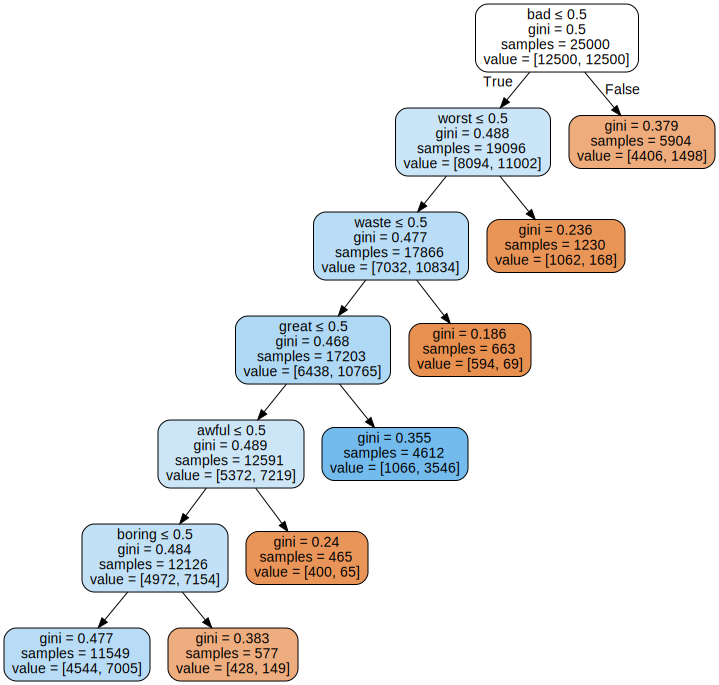

In [57]:
clf_tree = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_tree.fit(X_train, y_train)

tree_plot = tree.export_graphviz(clf_tree, out_file=None, 
                                      feature_names=f_names, 
                                      filled=True, rounded=True, 
                                      special_characters=True) 
tree_graph_noz = graphviz.Source(tree_plot)
tree_graph_noz

# Result Discussion
## Original Data



### Fit the Model to the Data with Z-score scaling

In [68]:
### Transform the X_train to dense
X_train_dense = X_train.todense()
X_test_dense = X_test.todense()

In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_dense)
X_train_scaled.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(25000, 10000)

In [71]:
X_test_scaled = scaler.transform(X_train_dense)
X_test_scaled.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(25000, 10000)

In [72]:
clf_l2 = LogisticRegression()
clf_l2.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
idx_l2 = np.argsort(np.absolute(clf_l2.coef_)[0,:])[::-1]

In [74]:
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
idx_l1 = np.argsort(np.absolute(clf_l1.coef_)[0,:])[::-1]

In [76]:
### Print on Pretty Table
lr_woz = PrettyTable(['Rank', 'L2 Features', 'L2 Weight', 'L1 Features', 'L1 Weight'])

for idx in range(0,10):
    lr_woz.add_row([idx+1, f_names[idx_l2[idx]], np.around(clf_l2.coef_[0,idx_l2[idx]], decimals=4), f_names[idx_l1[idx]], np.around(clf_l1.coef_[0,idx_l1[idx]], decimals=4)])

print('L2 and L1-regularized Logistic Regression Classifier WITH z-scoring')
print('Top 10 features and weights (with absolute value)')
print()
print(lr_woz)

L2 and L1-regularized Logistic Regression Classifier WITH z-scoring
Top 10 features and weights (with absolute value)

+------+-------------+-----------+-------------+-----------+
| Rank | L2 Features | L2 Weight | L1 Features | L1 Weight |
+------+-------------+-----------+-------------+-----------+
|  1   |    worst    |  -1.3315  |    worst    |  -1.3353  |
|  2   |     bad     |   -1.155  |    waste    |  -1.1681  |
|  3   |    waste    |   -1.065  |     bad     |  -1.0971  |
|  4   |    great    |   0.9473  |  excellent  |   0.8956  |
|  5   |  excellent  |   0.9285  |    awful    |  -0.8447  |
|  6   |    awful    |   -0.853  |    great    |   0.8152  |
|  7   |    boring   |  -0.8322  |   perfect   |   0.7102  |
|  8   |   terrible  |  -0.7751  |    boring   |  -0.6985  |
|  9   |     best    |   0.7082  |    poorly   |  -0.6732  |
|  10  |    worse    |  -0.7064  |     best    |   0.6728  |
+------+-------------+-----------+-------------+-----------+


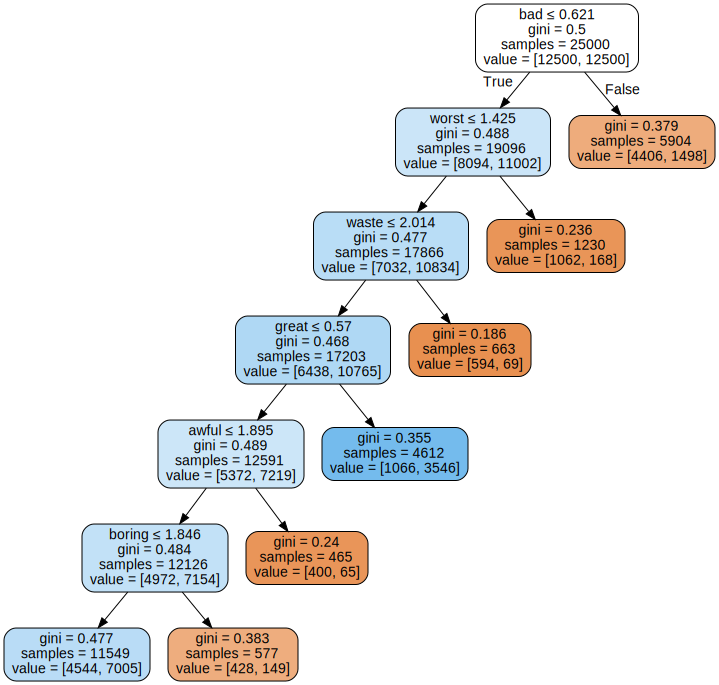

In [77]:
clf_tree = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_tree.fit(X_train_scaled, y_train)

tree_plot = tree.export_graphviz(clf_tree, out_file=None, 
                                      feature_names=f_names, 
                                      filled=True, rounded=True, 
                                      special_characters=True) 
tree_graph_noz = graphviz.Source(tree_plot)
tree_graph_noz

In [78]:
y_pred = clf_l2.predict(X_test_scaled)

In [79]:
y_pred_proba = clf_l2.predict_proba(X_test_scaled)
y_pred_proba.shape

(25000, 2)

In [80]:
y_pred_log_proba = clf_l2.predict_log_proba(X_test_scaled)
y_pred_log_proba.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1356: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


(25000, 2)

In [81]:
clf_l2.coef_.shape

(1, 10000)

In [82]:
clf_l2.intercept_

array([-0.36362513])

In [83]:
'''Copy the data X and coefficient w_i'''
X = np.copy(X_test_scaled)
coef_ = np.copy(clf_l2.coef_)
n_samples, n_features = X.shape

'''Initialize X_ev : x_i * w_i'''
X_ev = np.zeros((n_samples, n_features))

In [97]:
'''Get evidence'''
'''Calculate the w_ia_i'''
for idx in range(n_samples):
    X_ev[idx, :] = X[idx,:] * coef_

'''Generate the sets of P and N'''
X_pos_ev = X_ev * (X_ev > 0)
X_neg_ev = X_ev * (X_ev < 0)

'''Sum each the set P and N'''
pos_ev = np.sum(X_pos_ev, axis=1)
neg_ev = np.sum(X_neg_ev, axis=1)


### The most positive object with respect to the probabilities

In [98]:
most_pos_obj_idx = np.argmax(y_pred_proba[:,1])

In [122]:
print('Index of the object : ', most_pos_obj_idx)
print(X_test_scaled[most_pos_obj_idx, :].T)
print('Class : ', y_test[most_pos_obj_idx])
print('Predict Class : ', y_pred[most_pos_obj_idx])
print('a) Total  positive evidence : ', pos_ev[most_pos_obj_idx])
print('b) Total negative evidence : ', neg_ev[most_pos_obj_idx])
print('c) Probability distribution', y_pred_proba[most_pos_obj_idx])

#print(pos_ev[most_pos_obj_idx])
feature_pos = X_ev[most_pos_obj_idx,:]
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = X_ev[most_pos_obj_idx,:]
neg_list = np.argsort(feature_neg)
#feature_pos = np.multiply(X[most_pos_obj_idx, :], pos_X.T)
#pos_list = np.argsort(feature_pos)[::-1]
#feature_neg = np.multiply(1-X[most_pos_obj_idx, :], neg_X.T)
#neg_list = np.argsort(feature_neg)

print('d) Top 10 most positive words values that contribute most to the positive evidence')
for i in range(0,10):
#    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
     print('\t',f_names[pos_list[i]], '\t Value : ', X_test_scaled[most_pos_obj_idx, pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i], '\tCoef_ : ', coef_[0, pos_list[i]])
    
print('e) Top 10 most negative values that contribute most to the negative evidence')
for j in range(0,10):
#    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])
     print('\t',f_names[neg_list[j]], '\t Value : ', X_test_scaled[most_pos_obj_idx, neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

#print(np.sort(feature_pos)[::-1])     
#print(np.sort(feature_neg))
#print(pos_X)

Index of the object :  12540
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  1
Predict Class :  1
a) Total  positive evidence :  118.840235491
b) Total negative evidence :  -77.7315148418
c) Probability distribution [ 0.  1.]
d) Top 10 most positive words values that contribute most to the positive evidence
	 hyde 	 Value :  19.8953611886 	 Evidence Value :  4.74427589776 	Coef_ :  0.238461410817
	 sunk 	 Value :  24.6729831508 	 Evidence Value :  4.54383894931 	Coef_ :  0.184162527958
	 heartbreaking 	 Value :  18.6070476493 	 Evidence Value :  3.50346657154 	Coef_ :  0.188287074746
	 jonathan 	 Value :  17.0205074665 	 Evidence Value :  3.01615743782 	Coef_ :  0.17720725682
	 paxton 	 Value :  21.903635104 	 Evidence Value :  2.94431087185 	Coef_ :  0.134421106719
	 voyage 	 Value :  23.0415905184 	 Evidence Value :  2.83224856699 	Coef_ :  0.122918969709
	 survive 	 Value :  10.1785318421 	 Evidence Value :  2.66629542209 	Coef_ :  0.26195284

### The most negative object with respect to the probabilities.

In [103]:
most_neg_obj_idx = np.argmin(y_pred_proba[:,1])

In [105]:
print('Index of the object : ', most_neg_obj_idx)
print(X_test_scaled[most_neg_obj_idx, :])
print('Class : ', y_test[most_neg_obj_idx])
print('Predict Class : ', y_pred[most_neg_obj_idx])
print('a) Total  positive evidence : ', pos_ev[most_neg_obj_idx])
print('b) Total negative evidence : ', neg_ev[most_neg_obj_idx])
print('c) Probability distribution', y_pred_proba[most_neg_obj_idx])

feature_pos = X_ev[most_neg_obj_idx,:]
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = X_ev[most_neg_obj_idx,:]
neg_list = np.argsort(feature_neg)
#feature_pos = np.multiply(X[most_neg_obj_idx, :], pos_X.T)
#pos_list = np.argsort(feature_pos)[::-1]
#feature_neg = np.multiply(1-X[most_neg_obj_idx, :], neg_X.T)
#neg_list = np.argsort(feature_neg)

print('d) Top 10 features values that contribute most to the positive evidence')
for i in range(0,10):
#    print('\t',pos_list[i], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
    print('\t',f_names[pos_list[i]], '\t Value : ', X_test_scaled[most_neg_obj_idx, pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])

    
print('e) Top 10 features values that contribute most to the negative evidence')
for j in range(0,10):
#    print('\t',neg_list[j], '\t Evidence Value : ', np.sort(feature_neg)[j])
    print('\t',f_names[neg_list[j]], '\t Value : ', X_test_scaled[most_neg_obj_idx, neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

    
#print(np.sort(feature_pos)[::-1])     
#print(np.sort(feature_neg))

Index of the object :  5388
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  0
Predict Class :  0
a) Total  positive evidence :  150.059267219
b) Total negative evidence :  -262.336086569
c) Probability distribution [  1.00000000e+00   1.20469338e-49]
d) Top 10 features values that contribute most to the positive evidence
	 defending 	 Value :  24.6729831508 	 Evidence Value :  5.96255083825
	 drain 	 Value :  24.9799919936 	 Evidence Value :  4.47009504885
	 vet 	 Value :  25.6299578002 	 Evidence Value :  3.71228639975
	 deciding 	 Value :  21.903635104 	 Evidence Value :  3.51175438322
	 prolific 	 Value :  25.9745197391 	 Evidence Value :  3.12749427398
	 attached 	 Value :  14.0503629282 	 Evidence Value :  2.80881121425
	 helped 	 Value :  9.02819200201 	 Evidence Value :  2.77112386632
	 uncut 	 Value :  20.0555679663 	 Evidence Value :  2.60136022594
	 jungle 	 Value :  13.8314023984 	 Evidence Value :  2.46733013405
	 incompetence 	 Valu

### The object that has the largest positive evidence.

In [107]:
most_pos_ev_idx = np.argmax(pos_ev)

In [109]:
print('Index of the object : ', most_pos_ev_idx)
print(X_test_scaled[most_pos_ev_idx, :])
print('Class : ', y_test[most_pos_ev_idx])
print('Predict Class : ', y_pred[most_pos_ev_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_pos_ev_idx])
print('b) Total negative log-evidence : ', neg_ev[most_pos_ev_idx])
print('c) Probability distribution', y_pred_proba[most_pos_ev_idx])

feature_pos = X_ev[most_pos_ev_idx,:]
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = X_ev[most_pos_ev_idx,:]
neg_list = np.argsort(feature_neg)

print('d) Top 10 features values that contribute most to the positive evidence')
for i in range(0,10):
#    print('\t',pos_list[i], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
    print('\t',f_names[pos_list[i]], '\t Value : ', X_test_scaled[most_pos_ev_idx, pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i]) 

print('e) Top 10 features values that contribute most to the negative evidence')
for j in range(0,10):
#    print('\t',neg_list[j], '\t Evidence Value : ', np.sort(feature_neg)[j])
    print('\t',f_names[neg_list[j]], '\t Value : ', X_test_scaled[most_pos_ev_idx, neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

    
#print(np.sort(feature_pos)[::-1])     
#print(np.sort(feature_neg))

Index of the object :  16846
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  1
Predict Class :  1
a) Total  positive log-evidence :  340.616885225
b) Total negative log-evidence :  -268.113992102
c) Probability distribution [ 0.  1.]
d) Top 10 features values that contribute most to the positive evidence
	 scariest 	 Value :  20.5603699762 	 Evidence Value :  8.52340251342
	 architecture 	 Value :  27.9329554469 	 Evidence Value :  8.2734180702
	 bartender 	 Value :  28.380479434 	 Evidence Value :  8.00693715322
	 alcoholism 	 Value :  26.7074093518 	 Evidence Value :  5.20599591304
	 psyche 	 Value :  21.903635104 	 Evidence Value :  4.26647960916
	 patients 	 Value :  19.4367661608 	 Evidence Value :  4.13632946582
	 spring 	 Value :  15.5472970835 	 Evidence Value :  4.10981116117
	 crown 	 Value :  23.0415905184 	 Evidence Value :  4.10028206106
	 stanley 	 Value :  14.7749194791 	 Evidence Value :  3.90051246957
	 imaginary 	 Value :  23.0

### The object that has the largest negative evidence.

In [110]:
most_neg_ev_idx = np.argmin(neg_ev)

In [111]:
print('Index of the object : ', most_neg_ev_idx)
print(X_test_scaled[most_neg_ev_idx, :])
print('Class : ', y_test[most_neg_ev_idx])
print('Predict Class : ', y_pred[most_neg_ev_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_neg_ev_idx])
print('b) Total negative log-evidence : ', neg_ev[most_neg_ev_idx])
print('c) Probability distribution', y_pred_proba[most_neg_ev_idx])

feature_pos = X_ev[most_neg_ev_idx,:]
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = X_ev[most_neg_ev_idx,:]
neg_list = np.argsort(feature_neg)

print('d) Top 10 features values that contribute most to the positive evidence')
for i in range(0,10):
#    print('\t',pos_list[i], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
    print('\t',f_names[pos_list[i]], '\t Value : ', X_test_scaled[most_neg_ev_idx, pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])  

print('e) Top 10 features values that contribute most to the negative evidence')
for j in range(0,10):
#    print('\t',neg_list[j], '\t Evidence Value : ', np.sort(feature_neg)[j])
    print('\t',f_names[neg_list[j]], '\t Value : ', X_test_scaled[most_neg_ev_idx, neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])


Index of the object :  4700
[ -0.05701343  -0.09422382   2.52609645 ...,  14.16378845  -0.03288111
  -0.03466182]
Class :  0
Predict Class :  0
a) Total  positive log-evidence :  218.158125081
b) Total negative log-evidence :  -294.394688462
c) Probability distribution [  1.00000000e+00   5.40705537e-34]
d) Top 10 features values that contribute most to the positive evidence
	 apocalyptic 	 Value :  23.5490032816 	 Evidence Value :  8.81461923091
	 abandoned 	 Value :  11.8424211145 	 Evidence Value :  4.78346288828
	 shed 	 Value :  18.3531424513 	 Evidence Value :  3.88686739447
	 funniest 	 Value :  8.64624633917 	 Evidence Value :  3.52033187703
	 stack 	 Value :  23.0415905184 	 Evidence Value :  2.97675139801
	 perfect 	 Value :  4.17246038039 	 Evidence Value :  2.93797126939
	 infested 	 Value :  30.4125948568 	 Evidence Value :  2.86648786701
	 continues 	 Value :  9.90991166491 	 Evidence Value :  2.73441762429
	 hello 	 Value :  18.2300118852 	 Evidence Value :  2.7287715727

### The most uncertain object with respect to the probabilities.

In [118]:
uncertain_idx = np.argmin(np.square(y_pred_proba[:,1]-0.5))

In [119]:
print('Index of the object : ', uncertain_idx)
print(X_test_scaled[uncertain_idx, :])
print('Class : ', y_test[uncertain_idx])
print('Predict Class : ', y_pred[uncertain_idx])

if y_test[uncertain_idx] != y_pred[uncertain_idx]:
    print('\t \t \t \t \t False Positive')

print('a) Total  positive evidence : ', pos_ev[uncertain_idx])
print('b) Total negative evidence : ', neg_ev[uncertain_idx])
print('c) Probability distribution', y_pred_proba[uncertain_idx])

feature_pos = X_ev[uncertain_idx,:]
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = X_ev[uncertain_idx,:]
neg_list = np.argsort(feature_neg)

print('d) Top 10 features values that contribute most to the positive evidence')
for i in range(0,10):
#    print('\t',pos_list[i], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
    print('\t',f_names[pos_list[i]], '\t Value : ', X_test_scaled[uncertain_idx, pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])   

print('e) Top 10 features values that contribute most to the negative evidence')
for j in range(0,10):
#    print('\t',neg_list[j], '\t Evidence Value : ', np.sort(feature_neg)[j])
    print('\t',f_names[neg_list[j]], '\t Value : ', X_test_scaled[uncertain_idx, neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

Index of the object :  17496
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  1
Predict Class :  1
a) Total  positive evidence :  50.7076723418
b) Total negative evidence :  -48.1911462172
c) Probability distribution [ 0.10406045  0.89593955]
d) Top 10 features values that contribute most to the positive evidence
	 well 	 Value :  1.52259331956 	 Evidence Value :  0.785022963667
	 bad 	 Value :  -0.556034797717 	 Evidence Value :  0.642205099226
	 know 	 Value :  2.05619505427 	 Evidence Value :  0.562616779856
	 was 	 Value :  -1.35264732363 	 Evidence Value :  0.506115646954
	 not 	 Value :  -1.21864246735 	 Evidence Value :  0.437237464794
	 worst 	 Value :  -0.315942446627 	 Evidence Value :  0.420674842992
	 just 	 Value :  -0.854741399668 	 Evidence Value :  0.364632166652
	 br 	 Value :  -1.19130128908 	 Evidence Value :  0.351958959116
	 tired 	 Value :  8.32013936789 	 Evidence Value :  0.305935472843
	 no 	 Value :  -0.699208737982 	 Ev